In [22]:
import pickle

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier

In [5]:
# learn_data.csv へのパス
data = '/Users/tn250021/Projects/2018/Suzuki/analytics/data/interim-bak/interim/cleansed-text-joined_F_FAULT_PROPOSAL_LL-F_FAULT_WHEN_LL-F_FAULT_SITUATION_LL/filtered-parsed_docs_chasen_noise_parts_count-stop_words=stop_words.1.csv_doc_word_freq/rf_60topics/learn_data.csv'

In [6]:
df = pd.read_csv(data, encoding='utf-16', sep='\t')

In [7]:
df

,id,doc,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,...,F_INFO_TRANS_NO,F_INFO_FUEL,F_INFO_INJECTION,F_INFO_ENGINE_CHARGER,F_INFO_VVT_FLG,F_INFO_LEAN_BURN_FLG,F_INFO_HYBRID_FLG,F_INFO_DRIVE,F_INFO_GEARBOX,parts
0,JP200410B50150,走行中交差点を回ったら排気漏れの異音がした。 $ EXパイプのフランジ部(EXマニホールド側...,0.009718,0.020690,0.041266,0.000004,0.041119,0.000022,0.000009,0.000012,...,,1,1,1,,,,1,1,14190 - パイプ エキゾ-スト
1,JP200410B50406,エンジンかけたらキュルキュル音がする。特に朝一。信号待ち時にも鳴る。 $ ベルトに変摩耗なく...,0.009753,0.028203,0.041153,0.000037,0.012444,0.000019,0.050481,0.000031,...,,1,1,2,,,,1,2,"17521 - ベルト,ウオ?タポンプ"
2,JP200410B50459,排気洩れのため、排気音が大きい。 $ エキゾーストパイプ取付口の溶接剥がれのため、口があき排...,0.011947,0.025441,0.050746,0.000003,0.015328,0.000005,0.000014,0.000003,...,,1,1,1,,,,1,2,14190 - パイプ エキゾ-スト
3,JP200411B50193,走行時リヤから「ゴー」と音が鳴る。 $ 左ベアリングがガタガタになっていた。 $,0.008604,0.018312,0.036563,0.000011,0.039180,0.010822,0.000017,0.000011,...,,1,1,2,,,,1,2,"46860 - ベアリング,リヤホイ-ル"
4,JP200411B50317,前の方から、変な音がする。メーター内サイドブレーキのランプが点きっぱなし。 $ 駐車場などで...,0.010911,0.022940,0.045666,0.008117,0.013796,0.000016,0.000021,0.001014,...,,1,1,1,,,,1,2,"55810 - パツドセツト, デイスクブレーキ"
5,JP200411B50368,エンジンをかけたら突然排気音が大きくなっていた。見てみるとマフラーが途中で折れていた。 $ ...,0.009483,0.043131,0.037297,0.000048,0.011303,0.000072,0.016898,0.000038,...,,1,1,1,,,,2,1,14300 - マフラ
6,JP200411B50457,走行中、突然、排気音が大きくなった。 $ フロントパイプのフランジを溶接している部分が割れて...,0.008584,0.018257,0.036417,0.000004,0.036269,0.000049,0.000009,0.000009,...,,1,1,1,,,,1,1,14190 - パイプ エキゾ-スト
7,JP200411B50479,走行中音がうるさい。 $ エキゾーストパイプの溶接部分から排気漏れ。 $,0.000111,0.000036,0.000031,0.000030,0.131605,0.000088,0.000005,0.000018,...,,1,1,1,,,,1,1,14190 - パイプ エキゾ-スト
8,JP200411B50516,走行中に後ろからゴー音がする。 $ 右後ろのハブベアリングより異音がしていました。 $,0.010603,0.022588,0.045086,0.000003,0.057849,0.001962,0.000014,0.000001,...,,1,1,1,,,,1,2,"46860 - ベアリング,リヤホイ-ル"
9,JP200411B50556,アイドリングでエンジンからシャリシャリ音がする $ ウォーターポンプより異音が発生。 $,0.011365,0.032253,0.048290,0.000005,0.014587,0.000005,0.005908,0.000004,...,,1,1,1,,,,1,2,"17400 - ポンプアッシ,ウオ?タ"


In [33]:
df.columns

Index(['id', 'doc', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4',
       'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10',
       'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16',
       'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22',
       'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28',
       'topic_29', 'topic_30', 'topic_31', 'topic_32', 'topic_33', 'topic_34',
       'topic_35', 'topic_36', 'topic_37', 'topic_38', 'topic_39', 'topic_40',
       'topic_41', 'topic_42', 'topic_43', 'topic_44', 'topic_45', 'topic_46',
       'topic_47', 'topic_48', 'topic_49', 'topic_50', 'topic_51', 'topic_52',
       'topic_53', 'topic_54', 'topic_55', 'topic_56', 'topic_57', 'topic_58',
       'topic_59', 'F_SELLING_MODEL_SIGN', 'F_FCOK', 'F_MILEAGE',
       'F_INFO_TRANS_NO', 'F_INFO_FUEL', 'F_INFO_INJECTION',
       'F_INFO_ENGINE_CHARGER', 'F_INFO_VVT_FLG', 'F_INFO_LEAN_BURN_FLG',
       'F_INFO_HYB

In [38]:
pd.get_dummies(df, columns=['F_INFO_HYBRID_FLG', 'F_INFO_DRIVE'], prefix_sep='=')

,id,doc,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,...,F_INFO_VVT_FLG,F_INFO_LEAN_BURN_FLG,F_INFO_GEARBOX,parts,F_INFO_HYBRID_FLG=,F_INFO_HYBRID_FLG=1,F_INFO_HYBRID_FLG=2,F_INFO_DRIVE=,F_INFO_DRIVE=1,F_INFO_DRIVE=2
0,JP200410B50150,走行中交差点を回ったら排気漏れの異音がした。 $ EXパイプのフランジ部(EXマニホールド側...,0.009718,0.020690,0.041266,0.000004,0.041119,0.000022,0.000009,0.000012,...,,,1,14190 - パイプ エキゾ-スト,1,0,0,0,1,0
1,JP200410B50406,エンジンかけたらキュルキュル音がする。特に朝一。信号待ち時にも鳴る。 $ ベルトに変摩耗なく...,0.009753,0.028203,0.041153,0.000037,0.012444,0.000019,0.050481,0.000031,...,,,2,"17521 - ベルト,ウオ?タポンプ",1,0,0,0,1,0
2,JP200410B50459,排気洩れのため、排気音が大きい。 $ エキゾーストパイプ取付口の溶接剥がれのため、口があき排...,0.011947,0.025441,0.050746,0.000003,0.015328,0.000005,0.000014,0.000003,...,,,2,14190 - パイプ エキゾ-スト,1,0,0,0,1,0
3,JP200411B50193,走行時リヤから「ゴー」と音が鳴る。 $ 左ベアリングがガタガタになっていた。 $,0.008604,0.018312,0.036563,0.000011,0.039180,0.010822,0.000017,0.000011,...,,,2,"46860 - ベアリング,リヤホイ-ル",1,0,0,0,1,0
4,JP200411B50317,前の方から、変な音がする。メーター内サイドブレーキのランプが点きっぱなし。 $ 駐車場などで...,0.010911,0.022940,0.045666,0.008117,0.013796,0.000016,0.000021,0.001014,...,,,2,"55810 - パツドセツト, デイスクブレーキ",1,0,0,0,1,0
5,JP200411B50368,エンジンをかけたら突然排気音が大きくなっていた。見てみるとマフラーが途中で折れていた。 $ ...,0.009483,0.043131,0.037297,0.000048,0.011303,0.000072,0.016898,0.000038,...,,,1,14300 - マフラ,1,0,0,0,0,1
6,JP200411B50457,走行中、突然、排気音が大きくなった。 $ フロントパイプのフランジを溶接している部分が割れて...,0.008584,0.018257,0.036417,0.000004,0.036269,0.000049,0.000009,0.000009,...,,,1,14190 - パイプ エキゾ-スト,1,0,0,0,1,0
7,JP200411B50479,走行中音がうるさい。 $ エキゾーストパイプの溶接部分から排気漏れ。 $,0.000111,0.000036,0.000031,0.000030,0.131605,0.000088,0.000005,0.000018,...,,,1,14190 - パイプ エキゾ-スト,1,0,0,0,1,0
8,JP200411B50516,走行中に後ろからゴー音がする。 $ 右後ろのハブベアリングより異音がしていました。 $,0.010603,0.022588,0.045086,0.000003,0.057849,0.001962,0.000014,0.000001,...,,,2,"46860 - ベアリング,リヤホイ-ル",1,0,0,0,1,0
9,JP200411B50556,アイドリングでエンジンからシャリシャリ音がする $ ウォーターポンプより異音が発生。 $,0.011365,0.032253,0.048290,0.000005,0.014587,0.000005,0.005908,0.000004,...,,,2,"17400 - ポンプアッシ,ウオ?タ",1,0,0,0,1,0


In [4]:
# learn_data_dummy.pkl へのパス
dummy_data = '/Users/tn250021/Projects/2018/Suzuki/analytics/data/interim-bak/interim/cleansed-text-joined_F_FAULT_PROPOSAL_LL-F_FAULT_WHEN_LL-F_FAULT_SITUATION_LL/filtered-parsed_docs_chasen_noise_parts_count-stop_words=stop_words.1.csv_doc_word_freq/rf_60topics/learn_data_dummy.pkl'

In [3]:
with open(dummy_data, 'rb') as ifs:
    df_dummy = pickle.load(ifs)

In [8]:
df_dummy

,id,doc,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,...,F_INFO_HYBRID_FLG=2,F_INFO_DRIVE=,F_INFO_DRIVE=1,F_INFO_DRIVE=2,F_INFO_GEARBOX=,F_INFO_GEARBOX=1,F_INFO_GEARBOX=2,F_INFO_GEARBOX=3,F_INFO_GEARBOX=4,parts
14,JP200412B50440,ヒ−タ−使用時吹き出し口よりびびり音がする。 $ ヒ−タ−ユニット内部より音が出ている。吹き...,0.011899,0.027460,0.052835,0.000008,0.015252,0.004971,0.000013,0.000006,...,0,0,1,0,0,1,0,0,0,74100 - ヒ-タユニツト
19,JP200412B50743,風向(顔と足)にして、温度を一番暖かくし、風量を最大(4)にした時だけ、助手席左側エアコン吹...,0.038671,0.023480,0.045465,0.002701,0.013713,0.000017,0.000755,0.003013,...,0,1,0,0,1,0,0,0,0,74100 - ヒ-タユニツト
42,JP200502B50386,マフラーの音が急に大きくなった。 $ エキゾーストパイプの溶接部分で折損していた。 $,0.010863,0.023098,0.046072,0.000003,0.013904,0.000041,0.000012,0.000009,...,0,0,1,0,1,0,0,0,0,14190 - パイプ エキゾ-スト
69,JP200504B50328,冷機始動後発進しようとするとDレンジに入れても回転が上がるだけで進まない5分ほどして暖まると...,0.017094,0.029365,0.000084,0.000041,0.077650,0.000114,0.005686,0.000057,...,0,0,1,0,0,0,1,0,0,20002 - トランスミツシヨンアツシ オ-トマチツク
126,JP200510B50576,自宅より1km弱走行中異音(カラカラ音)が車両前方より発生し、停止後車両下部にオイルが漏れた...,0.031865,0.029813,0.048356,0.000009,0.021574,0.000019,0.000018,0.000010,...,0,0,0,1,0,1,0,0,0,99999 - 不明
188,JP200602B50154,走行中騒音がするようになった。 $ キャタリストケースの溶接部が剥がれていた。 $,0.000013,0.000023,0.000020,0.000008,0.099054,0.000168,0.000008,0.000031,...,0,1,0,0,1,0,0,0,0,14250 - ケ-ス キヤタリスト
195,JP200602B50536,ヒーター全開使用時、ヒー音がする。 $ ホット:風量全開吹き出し口:VENT+FOOT、FO...,0.009796,0.027311,0.041450,0.000024,0.012505,0.019552,0.000024,0.005333,...,0,0,1,0,0,0,1,0,0,74100 - ヒ-タユニツト
207,JP200602B51198,納車前に確認。暖房状態で風量レベル3以上、かつ、吹き出しモード フェイス位置及びフェース/フ...,0.010964,0.026506,0.046016,0.001985,0.013902,0.010918,0.000023,0.000014,...,0,0,1,0,0,0,1,0,0,74100 - ヒ-タユニツト
248,JP200603B50678,ブロアーファン最強時でモード切替により異音がする $ ヒーターユニットの中での音で原因が判ら...,0.011834,0.027687,0.050295,0.000008,0.015169,0.007897,0.000018,0.006142,...,0,1,0,0,1,0,0,0,0,74100 - ヒ-タユニツト
303,JP200604B50308,アクセル踏んだらシュルシュルと音が出る。 $ ファンベルトにかなりの数の亀裂が有り、ベルトが...,0.014238,0.024065,0.043944,0.000011,0.013268,0.000012,0.034547,0.000015,...,0,0,1,0,1,0,0,0,0,"17521 - ベルト,ウオ?タポンプ"


In [35]:
df_dummy.columns

Index(['id', 'doc', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4',
       'topic_5', 'topic_6', 'topic_7',
       ...
       'F_INFO_HYBRID_FLG=2', 'F_INFO_DRIVE= ', 'F_INFO_DRIVE=1',
       'F_INFO_DRIVE=2', 'F_INFO_GEARBOX= ', 'F_INFO_GEARBOX=1',
       'F_INFO_GEARBOX=2', 'F_INFO_GEARBOX=3', 'F_INFO_GEARBOX=4', 'parts'],
      dtype='object', length=23256)

In [11]:
# 説明変数 (トピック＋その他車両などの情報)
df_X = df_dummy.drop(['id', 'doc', 'parts'], axis=1)

# 目的変数 (部品)
levels_topics, labels_topics = pd.factorize(df_dummy['parts'].values)

In [39]:
df_X

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,F_INFO_HYBRID_FLG=1,F_INFO_HYBRID_FLG=2,F_INFO_DRIVE=,F_INFO_DRIVE=1,F_INFO_DRIVE=2,F_INFO_GEARBOX=,F_INFO_GEARBOX=1,F_INFO_GEARBOX=2,F_INFO_GEARBOX=3,F_INFO_GEARBOX=4
14,0.011899,0.027460,0.052835,0.000008,0.015252,0.004971,0.000013,0.000006,0.041325,0.059887,...,0,0,0,1,0,0,1,0,0,0
19,0.038671,0.023480,0.045465,0.002701,0.013713,0.000017,0.000755,0.003013,0.037152,0.053828,...,0,0,1,0,0,1,0,0,0,0
42,0.010863,0.023098,0.046072,0.000003,0.013904,0.000041,0.000012,0.000009,0.037660,0.054599,...,0,0,0,1,0,1,0,0,0,0
69,0.017094,0.029365,0.000084,0.000041,0.077650,0.000114,0.005686,0.000057,0.000110,0.000204,...,0,0,0,1,0,0,0,1,0,0
126,0.031865,0.029813,0.048356,0.000009,0.021574,0.000019,0.000018,0.000010,0.037507,0.053812,...,0,0,0,0,1,0,1,0,0,0
188,0.000013,0.000023,0.000020,0.000008,0.099054,0.000168,0.000008,0.000031,0.000005,0.000025,...,0,0,1,0,0,1,0,0,0,0
195,0.009796,0.027311,0.041450,0.000024,0.012505,0.019552,0.000024,0.005333,0.033886,0.049880,...,0,0,0,1,0,0,0,1,0,0
207,0.010964,0.026506,0.046016,0.001985,0.013902,0.010918,0.000023,0.000014,0.037642,0.055430,...,0,0,0,1,0,0,0,1,0,0
248,0.011834,0.027687,0.050295,0.000008,0.015169,0.007897,0.000018,0.006142,0.041128,0.059562,...,0,0,1,0,0,1,0,0,0,0
303,0.014238,0.024065,0.043944,0.000011,0.013268,0.000012,0.034547,0.000015,0.041333,0.052060,...,0,0,0,1,0,1,0,0,0,0


In [40]:
levels_topics

array([ 0,  0,  1, ..., 38, 52, 15])

In [41]:
labels_topics

array(['74100 - ヒ-タユニツト', '14190 - パイプ エキゾ-スト',
       '20002 - トランスミツシヨンアツシ オ-トマチツク', '99999 - 不明', '14250 - ケ-ス キヤタリスト',
       '17521 - ベルト,ウオ?タポンプ', '22620 - プレートコンプ, T/C ドライブ',
       '27610 - カツプリング リヤドライブ',
       '42415 - BRACKET,FR STAB BAR MOUNTブラケツト,フロントスタビライザバ-マウン',
       '84701 - ミラー,アウトリヤビュー,ライト',
       '82201 - LATCH ASSY,FRONT DOOR,Rラツチアツシ,フロントドア,ライト',
       '89101 - TANK ASSY,FUELタンクアツシ,フユ-エル', '14281 - マウンチング マフラ',
       '17400 - ポンプアッシ,ウオ?タ', '95200 - コンプレッサアッシ', '14300 - マフラ',
       '74150 - モ-タアツシ', '83401 - レギユレ-タアツシ フロントウインド ライト',
       '81810 - ストツプ フロントドアオ-プン', '27101 - シヤフトアツシ,プロペラNO.1',
       '48491 - シ-ル ステアリングシヤフト',
       '13870 - PIPE COMP,AIR CLNR INLETパイプ,エアクリ-ナインレツト',
       '85305 - バツクアツシ', '21000 - トランスミツシヨンアツシ CVT',
       '42412 - BUSHING,STAB BAR MOUNTブツシング,スタビライザバ-マウント',
       '54402 - ケ-ブル,パ-キングブレ-キ,レフト', '11620 - エンジンマウンチングレフト',
       '55101 - CALIPER,FRONT BRAKE,Rキヤリパ,フロントブレ-キ,ライト', '84901 - ベルトアツシ',
       '55810 - パツドセツト, デイスクブレーキ'

In [50]:
def save_tree(dt, filename):
        export_graphviz(
            dt,
            out_file=filename, 
            feature_names=df_X.columns,
            class_names=labels_topics,
            filled=True
        )

In [42]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X=df_X, y=df_dummy.parts)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

array([16,  9,  6,  5, -1, -1,  8, -1, -1, 13, 12, -1, -1, 15, -1, -1, 24,
       21, 20, -1, -1, 23, -1, -1, 28, 27, -1, -1, 30, -1, -1])

In [43]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

def show_tree(dt):
    graph = Source(
        tree.export_graphviz(
            dt,
            out_file=None, 
            feature_names=df_X.columns,
            class_names=labels_topics,
            filled = True))
    display(SVG(graph.pipe(format='svg')))


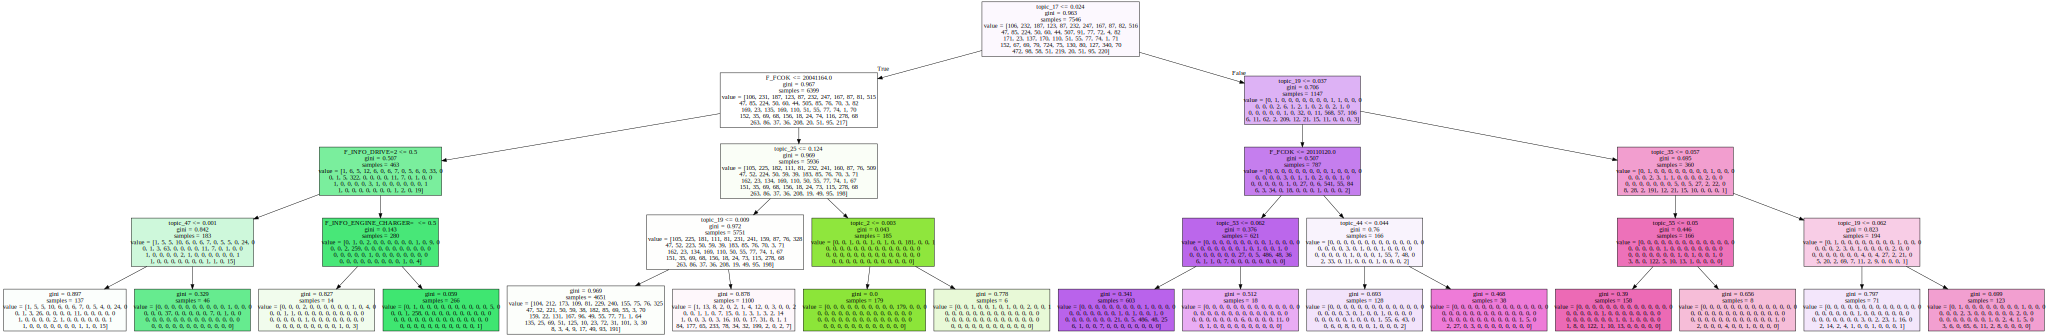

In [44]:
show_tree(dt)

In [52]:
save_tree(dt, 'tree_tutorial.dot')

In [53]:
dt_full = DecisionTreeClassifier(max_depth=None)
dt_full.fit(X=df_X, y=df_dummy.parts)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
save_tree(dt_full, 'tree_full.dot')

In [63]:
prediction = dt.predict(df_X)

In [64]:
prediction

array(['27610 - カツプリング リヤドライブ', '27610 - カツプリング リヤドライブ',
       '27610 - カツプリング リヤドライブ', ..., '17521 - ベルト,ウオ?タポンプ',
       '17521 - ベルト,ウオ?タポンプ', '17521 - ベルト,ウオ?タポンプ'], dtype=object)

In [65]:
sum(prediction == df_dummy.parts) / df_dummy.shape[0]

0.24609064404982772

In [67]:
prediction_full = dt_full.predict(df_X)

In [68]:
sum(prediction_full == df_dummy.parts) / df_dummy.shape[0]

1.0

In [71]:
msk = (np.random.rand(df_dummy.shape[0]) < 0.8)
df_train = df_dummy[msk]
df_train_X = df_train.drop(['id', 'doc', 'parts'], axis=1)
levels_train = levels_topics[msk]

df_test = df_dummy[~msk]
df_test_X = df_test.drop(['id', 'doc', 'parts'], axis=1)
levels_test = levels_topics[~msk]

In [77]:
df_train

,id,doc,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,...,F_INFO_HYBRID_FLG=2,F_INFO_DRIVE=,F_INFO_DRIVE=1,F_INFO_DRIVE=2,F_INFO_GEARBOX=,F_INFO_GEARBOX=1,F_INFO_GEARBOX=2,F_INFO_GEARBOX=3,F_INFO_GEARBOX=4,parts
14,JP200412B50440,ヒ−タ−使用時吹き出し口よりびびり音がする。 $ ヒ−タ−ユニット内部より音が出ている。吹き...,0.011899,0.027460,0.052835,0.000008,0.015252,0.004971,0.000013,0.000006,...,0,0,1,0,0,1,0,0,0,74100 - ヒ-タユニツト
19,JP200412B50743,風向(顔と足)にして、温度を一番暖かくし、風量を最大(4)にした時だけ、助手席左側エアコン吹...,0.038671,0.023480,0.045465,0.002701,0.013713,0.000017,0.000755,0.003013,...,0,1,0,0,1,0,0,0,0,74100 - ヒ-タユニツト
69,JP200504B50328,冷機始動後発進しようとするとDレンジに入れても回転が上がるだけで進まない5分ほどして暖まると...,0.017094,0.029365,0.000084,0.000041,0.077650,0.000114,0.005686,0.000057,...,0,0,1,0,0,0,1,0,0,20002 - トランスミツシヨンアツシ オ-トマチツク
126,JP200510B50576,自宅より1km弱走行中異音(カラカラ音)が車両前方より発生し、停止後車両下部にオイルが漏れた...,0.031865,0.029813,0.048356,0.000009,0.021574,0.000019,0.000018,0.000010,...,0,0,0,1,0,1,0,0,0,99999 - 不明
188,JP200602B50154,走行中騒音がするようになった。 $ キャタリストケースの溶接部が剥がれていた。 $,0.000013,0.000023,0.000020,0.000008,0.099054,0.000168,0.000008,0.000031,...,0,1,0,0,1,0,0,0,0,14250 - ケ-ス キヤタリスト
195,JP200602B50536,ヒーター全開使用時、ヒー音がする。 $ ホット:風量全開吹き出し口:VENT+FOOT、FO...,0.009796,0.027311,0.041450,0.000024,0.012505,0.019552,0.000024,0.005333,...,0,0,1,0,0,0,1,0,0,74100 - ヒ-タユニツト
248,JP200603B50678,ブロアーファン最強時でモード切替により異音がする $ ヒーターユニットの中での音で原因が判ら...,0.011834,0.027687,0.050295,0.000008,0.015169,0.007897,0.000018,0.006142,...,0,1,0,0,1,0,0,0,0,74100 - ヒ-タユニツト
312,JP200604B50798,"室内ブロワファンスイッチを全開にして,ヒーター温度強にして,風向きを顔にすると,ヒーターユニ...",0.010835,0.035567,0.045798,0.000013,0.013836,0.010803,0.000015,0.000022,...,0,0,1,0,0,0,1,0,0,74100 - ヒ-タユニツト
452,JP200607B51016,エンジン停止直後に、車両前部よりパスパス音発生 $ 異音自体が、排気漏れの音。エンジン上部よ...,0.010705,0.032627,0.049317,0.000008,0.013704,0.000036,0.005344,0.000012,...,0,0,1,0,0,0,1,0,0,14250 - ケ-ス キヤタリスト
563,JP200609B50600,エンジンを始動するとき、ギャーギャー異音がする。 $ セルモーターのギヤが噛み合っていないよ...,0.034096,0.029022,0.048896,0.000008,0.014772,0.000011,0.006633,0.000010,...,0,0,1,0,0,0,1,0,0,"22620 - プレートコンプ, T/C ドライブ"


In [78]:
df_test

,id,doc,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,...,F_INFO_HYBRID_FLG=2,F_INFO_DRIVE=,F_INFO_DRIVE=1,F_INFO_DRIVE=2,F_INFO_GEARBOX=,F_INFO_GEARBOX=1,F_INFO_GEARBOX=2,F_INFO_GEARBOX=3,F_INFO_GEARBOX=4,parts
42,JP200502B50386,マフラーの音が急に大きくなった。 $ エキゾーストパイプの溶接部分で折損していた。 $,0.010863,0.023098,0.046072,0.000003,0.013904,0.000041,0.000012,8.870545e-06,...,0,0,1,0,1,0,0,0,0,14190 - パイプ エキゾ-スト
207,JP200602B51198,納車前に確認。暖房状態で風量レベル3以上、かつ、吹き出しモード フェイス位置及びフェース/フ...,0.010964,0.026506,0.046016,0.001985,0.013902,0.010918,0.000023,1.391755e-05,...,0,0,1,0,0,0,1,0,0,74100 - ヒ-タユニツト
303,JP200604B50308,アクセル踏んだらシュルシュルと音が出る。 $ ファンベルトにかなりの数の亀裂が有り、ベルトが...,0.014238,0.024065,0.043944,0.000011,0.013268,0.000012,0.034547,1.484436e-05,...,0,0,1,0,1,0,0,0,0,"17521 - ベルト,ウオ?タポンプ"
421,JP200607B50190,エンジン息つき発生(2000rpm位で) $ エキパイ内の触媒が破損していた。 $,0.000028,0.087235,0.000078,0.000054,0.000115,0.000036,0.046133,3.703085e-05,...,0,0,1,0,0,1,0,0,0,14250 - ケ-ス キヤタリスト
507,JP200608B50690,アクセル床まで踏んでも、3000rpmぐらいまでしか回転上がらず、走らない。 その時アクセル...,0.012995,0.022306,0.044284,0.000010,0.013376,0.000010,0.000702,1.162976e-05,...,0,0,1,0,0,1,0,0,0,14250 - ケ-ス キヤタリスト
580,JP200609B51125,時々セルを回しても、ギーと音がして、かみ合わないような音がして、エンジンがかからない。 $ ...,0.012036,0.028718,0.051038,0.000080,0.015412,0.001186,0.003290,8.890726e-06,...,0,0,0,1,0,0,1,0,0,"22620 - プレートコンプ, T/C ドライブ"
658,JP200610B51283,走行中突然大きな音が、車の下から聞こえてきた。 $ エキゾーストパイプの中間あたりで折れてい...,0.009288,0.019791,0.039475,0.014002,0.039340,0.000021,0.000016,8.995009e-06,...,0,0,1,0,0,1,0,0,0,14190 - パイプ エキゾ-スト
659,JP200610B51320,左右旋回時、音がする。 $ 以前より保証延長等されているRBCですが、2004/9登録は当店...,0.011642,0.024810,0.049385,0.000049,0.014914,0.000009,0.000022,6.529836e-03,...,0,0,0,1,0,0,1,0,0,27610 - カツプリング リヤドライブ
661,JP200610B51326,左右旋回 前進時、グ−音が出る。 $ RBC対象車と同じ音。 $,0.011625,0.024759,0.049387,0.000010,0.014907,0.000006,0.000013,4.876501e-03,...,0,1,0,0,1,0,0,0,0,27610 - カツプリング リヤドライブ
737,JP200612B50861,販売店に排気音がうるさいという事で入庫。販売店が確認したところエキゾーストパイプが途中で折れ...,0.012100,0.025746,0.051362,0.000008,0.017517,0.000003,0.000010,5.651619e-06,...,0,0,0,1,0,0,1,0,0,14190 - パイプ エキゾ-スト


In [74]:
len(msk)

7546

In [75]:
sum(msk)

6060

In [84]:
dt_full = DecisionTreeClassifier(max_depth=None)
dt_full.fit(df_train_X, df_train.parts)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [85]:
prediction_full = dt_full.predict(df_test_X)

In [86]:
sum(prediction_full == df_test.parts) / df_test.shape[0]

0.531628532974428

In [82]:
labels_topics[prediction_full]

array([ 1,  0, 23, ..., 17, 36,  3])

In [92]:
 [2 ** i for i in range(1, 9)]

[2, 4, 8, 16, 32, 64, 128, 256]

In [96]:
for max_depth in [2 ** i for i in range(1, 9)] + [None]:
    dt_ = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    dt_.fit(df_train_X, df_train.parts)
    prediction = dt_.predict(df_test_X)
    print(max_depth)
    acc = sum(prediction == df_test.parts) / df_test.shape[0]
    print(acc)

2
0.20053835800807537
4
0.23822341857335128
8
0.392328398384926
16
0.5195154777927322
32
0.5477792732166891
64
0.5464333781965006
128
0.5464333781965006
256
0.5464333781965006
None
0.5464333781965006


In [103]:
correct = df_test.parts[prediction == df_test.parts].value_counts()
incorrect = df_test.parts[prediction != df_test.parts].value_counts()
df_n_correct = pd.concat([correct, incorrect], axis = 1)

/Users/tn250021/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [104]:
correct = df_test.parts[prediction == df_test.parts].value_counts()
incorrect = df_test.parts[prediction != df_test.parts].value_counts()
df_n_correct = pd.concat([correct, incorrect], axis = 1)
df_n_correct.columns = ['correct', 'incorrect']

In [110]:
correct = df_test.parts[prediction == df_test.parts].value_counts()
incorrect = df_test.parts[prediction != df_test.parts].value_counts()
df_n_correct = pd.concat([correct, incorrect], axis = 1)
df_n_correct.columns = ['correct', 'incorrect']
df_n_correct = df_n_correct.fillna(0).assign(tot=lambda df: df.correct + df.incorrect).assign(acc=lambda df: df.correct / df.tot)

In [111]:
df_n_correct.sort_values('acc', ascending=False)

,correct,incorrect,tot,acc
"89101 - TANK ASSY,FUELタンクアツシ,フユ-エル",1.0,0.0,1.0,1.000000
27610 - カツプリング リヤドライブ,74.0,7.0,81.0,0.913580
83401 - レギユレ-タアツシ フロントウインド ライト,119.0,32.0,151.0,0.788079
"17521 - ベルト,ウオ?タポンプ",66.0,20.0,86.0,0.767442
48580 - ボツクスアツシ ステアリングキ,25.0,8.0,33.0,0.757576
49400 - ペダルアツシ アクセレレ-タ,15.0,5.0,20.0,0.750000
84910 - バツクルアツシ フロントベルト,35.0,14.0,49.0,0.714286
48500 - ボツクスアツシ ステアリングギヤ,24.0,10.0,34.0,0.705882
"81850 - バランサ,バツクドア,ライト",8.0,4.0,12.0,0.666667
14271 - スチフナ エキゾ-ストマニホ-ルト,27.0,15.0,42.0,0.642857


In [112]:
for max_depth in [2 ** i for i in range(1, 9)] + [None]:
    dt_ = DecisionTreeClassifier(max_depth=max_depth, random_state=0, class_weight='balanced')
    dt_.fit(df_train_X, df_train.parts)
    prediction = dt_.predict(df_test_X)
    print(max_depth)
    acc = sum(prediction == df_test.parts) / df_test.shape[0]
    print(acc)

2
0.051816958277254375
4
0.08075370121130551
8
0.2510094212651413
16
0.4629878869448183
32
0.5
64
0.5114401076716016
128
0.5114401076716016
256
0.5114401076716016
None
0.5114401076716016


In [113]:
correct = df_test.parts[prediction == df_test.parts].value_counts()
incorrect = df_test.parts[prediction != df_test.parts].value_counts()
df_n_correct = pd.concat([correct, incorrect], axis = 1)
df_n_correct.columns = ['correct', 'incorrect']
df_n_correct = (
    df_n_correct
    .fillna(0)
    .assign(tot=lambda df: df.correct + df.incorrect)
    .assign(acc=lambda df: df.correct / df.tot)
)

/Users/tn250021/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [114]:
df_n_correct.sort_values('acc', ascending=False)

,correct,incorrect,tot,acc
27610 - カツプリング リヤドライブ,72.0,9,81.0,0.888889
49400 - ペダルアツシ アクセレレ-タ,16.0,4,20.0,0.800000
"24131 - SHAFT,TRANSMISSION COUNTEシヤフト,トランスミツシヨンカウンタ",7.0,2,9.0,0.777778
96100 - MGUアツシ,16.0,5,21.0,0.761905
"17521 - ベルト,ウオ?タポンプ",65.0,21,86.0,0.755814
83401 - レギユレ-タアツシ フロントウインド ライト,114.0,37,151.0,0.754967
74150 - モ-タアツシ,22.0,8,30.0,0.733333
"82201 - LATCH ASSY,FRONT DOOR,Rラツチアツシ,フロントドア,ライト",12.0,5,17.0,0.705882
84910 - バツクルアツシ フロントベルト,34.0,15,49.0,0.693878
"81850 - バランサ,バツクドア,ライト",8.0,4,12.0,0.666667


In [118]:
for min_samples_leaf in range(1, 6):
    dt_ = DecisionTreeClassifier(
        min_samples_leaf=min_samples_leaf,
#         min_samples_split=min_samples_leaf,
        random_state=0,
#         class_weight='balanced'
    )
    dt_.fit(df_train_X, df_train.parts)
    prediction = dt_.predict(df_test_X)
    print(min_samples_leaf)
    acc = sum(prediction == df_test.parts) / df_test.shape[0]
    print(acc)

1
0.5464333781965006
2
0.5356662180349933
3
0.5376850605652759
4
0.5484522207267833
5
0.5545087483176312


In [125]:
rf_full = RandomForestClassifier(max_depth=None, n_estimators=500, class_weight='balanced')
rf_full.fit(df_train_X, df_train.parts)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [126]:
prediction = rf_full.predict(df_test_X)
acc = sum(prediction == df_test.parts) / df_test.shape[0]

In [127]:
acc

0.5524899057873486

In [131]:
pd.Series(prediction).value_counts()

83401 - レギユレ-タアツシ フロントウインド ライト                         249
85103 - フレ?ムアツシ,フロントクツシヨン,ライト                          140
27610 - カツプリング リヤドライブ                                  139
17521 - ベルト,ウオ?タポンプ                                    137
86606 - アジヤスタアツシ                                        69
11620 - エンジンマウンチングレフト                                   67
14281 - マウンチング マフラ                                      65
84910 - バツクルアツシ フロントベルト                                 57
99999 - 不明                                              52
14271 - スチフナ エキゾ-ストマニホ-ルト                               50
21000 - トランスミツシヨンアツシ CVT                                45
13870 - PIPE COMP,AIR CLNR INLETパイプ,エアクリ-ナインレツト         39
74150 - モ-タアツシ                                          38
48580 - ボツクスアツシ ステアリングキ                                 36
48500 - ボツクスアツシ ステアリングギヤ                                28
48200 - コラムアツシ コラプシブルステ                                 21
49400 - ペダルアツシ アクセレレ-タ                                  

In [132]:
correct = df_test.parts[prediction == df_test.parts].value_counts()
incorrect = df_test.parts[prediction != df_test.parts].value_counts()
df_n_correct = pd.concat([correct, incorrect], axis = 1)
df_n_correct.columns = ['correct', 'incorrect']
df_n_correct = (
    df_n_correct
    .fillna(0)
    .assign(tot=lambda df: df.correct + df.incorrect)
    .assign(acc=lambda df: df.correct / df.tot)
)

/Users/tn250021/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [133]:
df_n_correct.sort_values('acc', ascending=False)

,correct,incorrect,tot,acc
27610 - カツプリング リヤドライブ,78.0,3,81.0,0.962963
83401 - レギユレ-タアツシ フロントウインド ライト,144.0,7,151.0,0.953642
49400 - ペダルアツシ アクセレレ-タ,17.0,3,20.0,0.850000
"17521 - ベルト,ウオ?タポンプ",72.0,14,86.0,0.837209
74150 - モ-タアツシ,25.0,5,30.0,0.833333
48580 - ボツクスアツシ ステアリングキ,26.0,7,33.0,0.787879
38340 - ブレ-ドアツシ ワイパ,14.0,4,18.0,0.777778
"81850 - バランサ,バツクドア,ライト",9.0,3,12.0,0.750000
"42412 - BUSHING,STAB BAR MOUNTブツシング,スタビライザバ-マウント",9.0,3,12.0,0.750000
55311 - デイスク フロントブレ-キ,14.0,5,19.0,0.736842


In [135]:
prediction[df_test.parts == '83661 - ラン']

array(['83401 - レギユレ-タアツシ フロントウインド ライト', '83401 - レギユレ-タアツシ フロントウインド ライト',
       '83661 - ラン', '83401 - レギユレ-タアツシ フロントウインド ライト',
       '83401 - レギユレ-タアツシ フロントウインド ライト', '83401 - レギユレ-タアツシ フロントウインド ライト',
       '83401 - レギユレ-タアツシ フロントウインド ライト', '83401 - レギユレ-タアツシ フロントウインド ライト',
       '83401 - レギユレ-タアツシ フロントウインド ライト', '83401 - レギユレ-タアツシ フロントウインド ライト',
       '83401 - レギユレ-タアツシ フロントウインド ライト', '83401 - レギユレ-タアツシ フロントウインド ライト',
       '83401 - レギユレ-タアツシ フロントウインド ライト', '83401 - レギユレ-タアツシ フロントウインド ライト',
       '83401 - レギユレ-タアツシ フロントウインド ライト', '83401 - レギユレ-タアツシ フロントウインド ライト',
       '83401 - レギユレ-タアツシ フロントウインド ライト', '83401 - レギユレ-タアツシ フロントウインド ライト',
       '85103 - フレ?ムアツシ,フロントクツシヨン,ライト', '83661 - ラン',
       '14271 - スチフナ エキゾ-ストマニホ-ルト', '83401 - レギユレ-タアツシ フロントウインド ライト',
       '83661 - ラン', '85103 - フレ?ムアツシ,フロントクツシヨン,ライト', '83661 - ラン',
       '83661 - ラン'], dtype=object)